### ZIPファイルの解凍

In [67]:
#ZIPファイルを解凍する。

import zipfile

def unzip(file): 
    with zipfile.ZipFile(file, 'r') as zf:
        zf.extractall()

In [69]:
unzip("train_3.zip")

### X_train(仮)の作成＆リサイズ

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
% matplotlib inline
import cv2

In [3]:
X_train=[]

for i in range (0,4000):
    img = cv2.imread("C://Users//user//CookPad Analytics//train_1//train_{}.jpg".format(i))
    X_train.append(img)
    
    if "None" in str(type(X_train[i])):
        img2 = cv2.imread("C://Users//user//CookPad Analytics//train_1//train_{}.jpeg".format(i))
        X_train[i] = img2
    else:
        X_train[i]=X_train[i]

In [4]:
for i in range (4000,8000):
    img_train2 = cv2.imread("C://Users//user//CookPad Analytics//train_2//train_{}.jpg".format(i))
    X_train.append(img_train2)
    
    if "None" in str(type(X_train[i])):
        img2_train2 = cv2.imread("C://Users//user//CookPad Analytics//train_2//train_{}.jpeg".format(i))
        X_train[i] = img2_train2
    else:
        X_train[i]=X_train[i]

In [5]:
for i in range (8000,11995):
    img_train3 = cv2.imread("C://Users//user//CookPad Analytics//train_3//train_{}.jpg".format(i))
    X_train.append(img_train3)
    
    if "None" in str(type(X_train[i])):
        img2_train3 = cv2.imread("C://Users//user//CookPad Analytics//train_3//train_{}.jpeg".format(i))
        X_train[i] = img2_train3
    else:
        X_train[i]=X_train[i]

＊ str( )：文字列に変換

In [6]:
#リサイズを行う関数
def get_im(img):
    resized = cv2.resize(img, (224, 224))
    return resized

In [7]:
for i in range(0,11995):
    X_train[i] = get_im(X_train[i])

In [8]:
#画像を拡大する関数（Numpy、画像サイズの変化なし）

def crop_im(img):

    #画像を拡大　第一引数：変換する前の画像配列、第二引数：出力サイズ、fx =横軸方向拡大率、fy=縦軸方向拡大率、interpolation =補間方法の指定 
    zoomed_image = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation = cv2.INTER_LINEAR )

    #引き伸ばした画像を切り取る
    #元の画像と引き伸ばした画像の縦、横(、チャネル数)を取り出す
    height_1, width_1 = img.shape[:2]
    height_2, width_2 = zoomed_image.shape[:2]

    # x、y軸それぞれの切り取り開始点の決定　　　　割った際にfloatになってしまう、つまり整数でなくなることに注意！！　int()を用いて整数にする
    x =  int((width_2-width_1)/2)
    y =  int((height_2-height_1)/2)

    #切り取り開始点から元の画像分のサイズを切り取る
    crop_image = zoomed_image[y:y+height_1, x:x+width_1]
    
    return crop_image

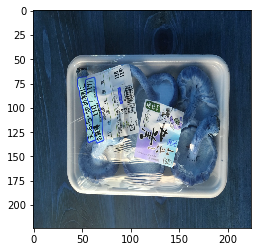

In [25]:
img1 = cv2.imread("C://Users//user//CookPad Analytics//train_1//train_0.jpg")

img1=get_im(img1)

plt.imshow(img1)

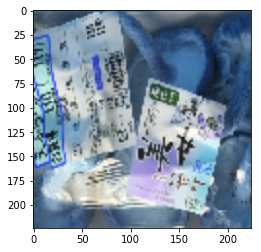

In [26]:
plt.imshow(crop_im(img1))

**＊画像を拡大する関数は、アスパラ、レモン、タコの3つに絞ってから使う！**

### y_train（仮） の作成

In [9]:
data=pd.read_csv( 'train_master.tsv', delimiter='\t')

In [123]:
data.tail()

,file_name,category_id
11990,train_11990.jpg,40
11991,train_11991.jpg,15
11992,train_11992.jpg,39
11993,train_11993.jpg,40
11994,train_11994.jpg,49


In [11]:
y_train=data["category_id"]

In [12]:
master=pd.read_csv("master.tsv",delimiter="\t")

In [13]:
master.head()

,abokado,0
0,asupara,1
1,banana,2
2,burokkori,3
3,chingensai,4
4,daikon,5


### まずは、画像データと正解ラベルのデータフレームを作成

In [122]:
y_train[y_train==1].head()

115    1
153    1
239    1
408    1
505    1
Name: category_id, dtype: int64

In [15]:
Series_X=pd.Series(X_train)

＊リストの状態の X_train を Series に変え、データフレームに変えていく

In [16]:
Series_X.head()

0    [[[34, 65, 98], [27, 52, 81], [29, 53, 77], [2...
1    [[[24, 33, 45], [34, 45, 53], [34, 47, 55], [2...
2    [[[27, 63, 108], [9, 42, 84], [15, 60, 110], [...
3    [[[46, 47, 58], [44, 46, 57], [44, 44, 60], [4...
4    [[[91, 106, 108], [98, 113, 116], [102, 117, 1...
dtype: object

In [17]:
df_image=pd.DataFrame(Series_X,columns=["image_file"])

In [19]:
#df_image=pd.DataFrame.from_records(X_train)

**多次元配列のリストをデータフレームにするときは注意が必要！**

In [19]:
df_image

,image_file
0,"[[[34, 65, 98], [27, 52, 81], [29, 53, 77], [2..."
1,"[[[24, 33, 45], [34, 45, 53], [34, 47, 55], [2..."
2,"[[[27, 63, 108], [9, 42, 84], [15, 60, 110], [..."
3,"[[[46, 47, 58], [44, 46, 57], [44, 44, 60], [4..."
4,"[[[91, 106, 108], [98, 113, 116], [102, 117, 1..."
5,"[[[161, 170, 160], [159, 167, 159], [162, 167,..."
6,"[[[20, 19, 15], [20, 19, 15], [19, 18, 14], [2..."
7,"[[[9, 15, 22], [10, 14, 20], [7, 10, 18], [8, ..."
8,"[[[118, 146, 180], [120, 150, 183], [119, 149,..."
9,"[[[193, 201, 222], [186, 193, 219], [190, 197,..."


In [18]:
train_data = df_image.join(y_train)

In [124]:
train_data.tail()

,image_file,category_id
11990,"[[[7, 10, 8], [7, 10, 8], [8, 9, 7], [8, 8, 7]...",40
11991,"[[[187, 198, 202], [190, 200, 205], [194, 205,...",15
11992,"[[[12, 55, 88], [18, 59, 92], [21, 64, 97], [2...",39
11993,"[[[52, 82, 83], [45, 71, 78], [75, 99, 105], [...",40
11994,"[[[49, 71, 112], [49, 74, 114], [55, 79, 121],...",49


＊ train_dataをいちいち作るのが面倒なので、.csvファイルとして保存しておく！

In [54]:
#train_data.to_csv("train_data.csv")

### 今回は、アスパラ：１、レモン：３６、タコ：４７の3つに絞る！

In [19]:
aspara = train_data[train_data["category_id"]==1]

In [20]:
remon = train_data[train_data["category_id"]==36]

In [21]:
tako = train_data[train_data["category_id"]==47]

In [22]:
selected_data = pd.concat([aspara, remon,tako], ignore_index=True)

In [29]:
selected_data

,image_file,category_id
0,"[[[93, 129, 207], [105, 141, 219], [89, 128, 2...",1
1,"[[[68, 72, 92], [70, 82, 89], [60, 82, 80], [1...",1
2,"[[[74, 116, 158], [85, 126, 168], [89, 125, 16...",1
3,"[[[114, 120, 73], [79, 86, 29], [92, 100, 39],...",1
4,"[[[196, 212, 219], [200, 211, 219], [198, 211,...",1
5,"[[[62, 56, 77], [134, 113, 119], [101, 85, 111...",1
6,"[[[53, 61, 68], [56, 64, 71], [57, 65, 72], [5...",1
7,"[[[65, 84, 97], [80, 73, 79], [131, 130, 131],...",1
8,"[[[206, 203, 202], [207, 203, 202], [207, 203,...",1
9,"[[[24, 33, 89], [8, 24, 74], [0, 9, 37], [7, 1...",1


＊ train_data をアスパラ、レモン、タコに絞ったデータフレームも、.csvファイルとして保存しておく。（selected_data）

In [ ]:
#selected_data.to_csv("selected_data.csv")

### ココから前処理、学習へ入る

In [4]:
#selected_data=pd.read_csv("selected_data.csv")

### selected_data の画像データ(image_file)に、拡大処理を施す。
**（画像を拡大する関数は定義済み；crop_im(img)）**

In [23]:
for i in range(0,603):
    selected_data["image_file"][i] = crop_im(selected_data["image_file"][i])

C:\Users\user\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


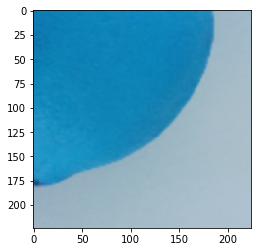

In [31]:
plt.imshow(selected_data["image_file"][411])

### selected_data を、X_train, y_train, X_test, y_test に分割する

In [189]:
X=selected_data["image_file"]

y=selected_data["category_id"]

In [192]:
# データフレームをarrayに変換

X = X.as_matrix()
y = y.as_matrix()

In [180]:
#for i in range(0,603):
#    X[i] = np.array(X[i]).astype("float32")

In [182]:
X[1].shape

(224, 224, 3)

**アスパラを０、レモンを１、タコを２に変換**
（One-Hot表現をしやすくするため）

In [183]:
y=np.where(y==1,0,y)
y=np.where(y==36,1,y)
y=np.where(y==47,2,y)

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [188]:
X_train.shape

(422,)

### X_trainのshapeが違う！！　⇒　（422, 224, 224, 3）であって欲しい！

In [73]:
X_train.shape

(422,)

In [74]:
y_test.shape

(181,)

## （警告）ここで既に何かが違う、、、アレイの中にアレイが。

In [131]:
# データの整形
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

for i in range(0,422):
    X_train[i] = X_train[i].reshape(-1, 224*224)

for i in range(0,181):
    X_test[i] = X_test[i].reshape(-1, 224*224)


Using TensorFlow backend.


In [135]:
X_train.shape

(422,)

In [136]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# モデルの「容器」を作成
model = Sequential()

# 「容器」へ各layer（Dense, Activation）を積み重ねていく（追加した順に配置されるので注意）
# 最初のlayerはinput_shapeを指定して、入力するデータの次元を与える必要がある
model.add(Dense(units=256, input_shape=(224*224,)))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('softmax'))

# モデルの学習方法について指定しておく
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [137]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(X_train, y_train, batch_size=1000, verbose=2, epochs=10, callbacks=[early_stopping])

ValueError: Error when checking input: expected dense_1_input to have shape (50176,) but got array with shape (1,)

In [57]:
X_train[0].shape

(3, 50176)

In [79]:
y_train[7]

array([0., 1., 0.])